<a href="https://colab.research.google.com/github/husfuu/Mathematical-Modelling/blob/main/Numerical%20Method/logistic%20model/euler_heun.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Model

The differential equation below is logistic model:
$$ \frac{dN(t)}{dt} = N(t)(a-bN(t)), \text{dengan } N(0) = N_0 $$ 

In [31]:
def dndt(t_k, N_k):
  return N_k*(a-b*N_k)

## Analytic Solution

Exact analytical solution:
$$ N(t) = \frac{a N_0}{(a-N_0 b) e^{-a(t-t_0)} + bN_0 }$$

In [4]:
def Nt_analytic(a, b, N0, t):
  """
  a: float, rate of
  b: float, rate of 
  N0: float, total population at t=0
  t: array of number, each number represent observation time
  return: array of number that represent exact solutions
  """
  total = len(t)
  N_analytics = np.array([])
  t0 = t[0]
  
  for i in range(total):
    N_analytic_i = a*N0 / ( (a-N0*b)*np.exp(-a*(t[i]-t0)) + b*N0)
    N_analytics = np.append(N_analytics, N_analytic_i)

  return N_analytics

## Euler's Method

$$ N_{k+1} = N_k + \Delta t (aN_k - b (N_k)^2 $$

In [18]:
def euler(a, b, delta_t, N0, t):
  """
  """
  total = len(t)
  N_euler = np.zeros(total)
  N_euler[0] = N0
  for i in range(total-1):
    N_euler[i+1] = N_euler[i] + delta_t * (a*N_euler[i] - b*N_euler[i]**2)
  
  return N_euler

## Heun Method

$$ \tilde{N}_{k+1} = N_k + \Delta t (aN_k - b(N_k)^2) $$



$$ N_{k+1} = \frac{\Delta t}{2} [(aN_k) + f(t_{k+1}, \tilde{N}_{k+1})] $$

In [32]:
def heun(a, b, delta_t, N0, t):

  total = len(t)
  N_heun = np.zeros(total)
  N_heun[0] = N0

  for k in range(total-1):
    P = N_heun[k] + delta_t * (a*N_heun[k] - b*N_heun[k]**2) 
    N_heun[k+1] = N_heun[k] + delta_t/2 * ( (a*N_heun[k] - b*N_heun[k]**2) + dndt( t[k],  P) )

  return N_heun

## Simulation Result

### Numerical Solution

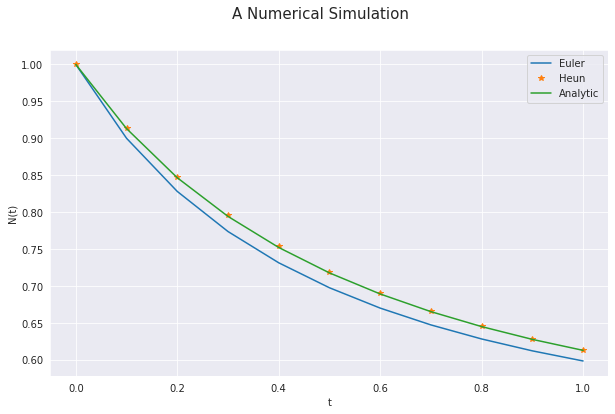

In [76]:
t = np.arange(start=0, stop=1.1, step=0.1)
delta_t = 0.1
N0 = 1
a = 1
b = 2

y_euler = euler(a, b, delta_t, N0, t)
y_heun = heun(a, b, delta_t, N0, t)
y_analytic = Nt_analytic(a, b, N0, t)


plt.figure(figsize=(10, 6))
plt.plot(t, y_euler, label="Euler")
plt.plot(t, y_heun, '*', label = "Heun")
plt.plot(t, y_analytic, label="Analytic")
plt.style.context("dark_background")

plt.suptitle('A Numerical Simulation', fontsize=15)
plt.xlabel('t', fontsize=10)
plt.ylabel('N(t)', fontsize=10)

plt.legend()

plt.show()

In [50]:
import pandas as pd

data_solution = {"t": t, "Exact": y_analytic, "Euler": y_euler , "Heun": y_heun}

pd.DataFrame(data)

,t,Exact,Euler,Heun
0,0.0,1.000000,1.000000,1.000000
1,0.1,0.913106,0.900000,0.914000
2,0.2,0.846547,0.828000,0.847798
3,0.3,0.794167,0.773683,0.795529
4,0.4,0.752061,0.731334,0.753417
5,0.5,0.717633,0.697498,0.718930
6,0.6,0.689090,0.669947,0.690305
7,0.7,0.665152,0.647176,0.666276
8,0.8,0.644882,0.628126,0.645914
9,0.9,0.627577,0.612030,0.628522


### Errors Comparison

In [57]:
errorEuler = abs(y_euler-y_analytic)
errorHeun = abs(y_heun-y_analytic) 


data_errors = {"t": t, "Erorr of Euler's": errorEuler , "Error of Heun's": errorHeun }
pd.DataFrame(data_errors)

,t,Erorr of Euler's,Error of Heun's
0,0.0,0.000000,0.000000
1,0.1,0.013106,0.000894
2,0.2,0.018547,0.001251
3,0.3,0.020483,0.001362
4,0.4,0.020726,0.001357
5,0.5,0.020135,0.001297
6,0.6,0.019143,0.001214
7,0.7,0.017977,0.001123
8,0.8,0.016756,0.001032
9,0.9,0.015547,0.000945


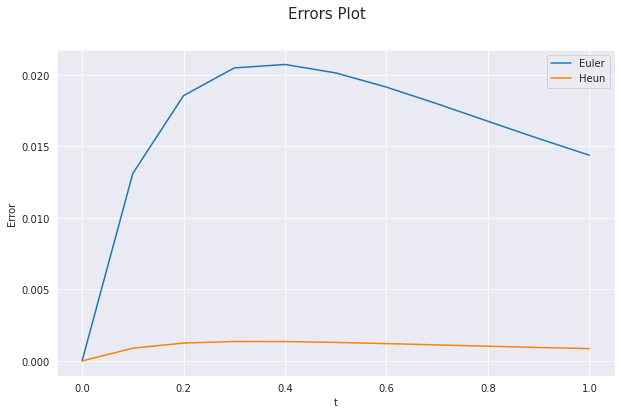

In [75]:
y_euler = euler(a, b, delta_t, N0, t)
y_heun = heun(a, b, delta_t, N0, t)
y_analytic = Nt_analytic(a, b, N0, t)

plt.figure(figsize=(10, 6))
plt.plot(t, errorEuler, label="Euler")
plt.plot(t, errorHeun, label = "Heun")
plt.style.context("dark_background")

plt.suptitle('Errors Plot', fontsize=15)
plt.xlabel('t', fontsize=10)
plt.ylabel('Error', fontsize=10)
plt.legend()

plt.show()